In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.imports import *

# from fastai.transforms import import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [2]:
PATH = 'SpaceNet_Roads_Sample/'

In [3]:
dirs = os.listdir(PATH)
dirs.sort()

In [4]:
VEGAS, PARIS, SHANG, KHART = [PATH + directory + '/' for directory in dirs]

In [5]:
model = resnet34(True)

In [26]:
model

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

Delete top layers:

In [42]:
# viewing last Conv block + top linear layers
[layer for layer in model.children()][-3:]

[Sequential (
   (0): BasicBlock (
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
     (relu): ReLU (inplace)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
     (downsample): Sequential (
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
     )
   )
   (1): BasicBlock (
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
     (relu): ReLU (inplace)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
   )
   (2): BasicBlock (
     (conv1): Conv2d(512, 512, 

In [6]:
model = nn.Sequential(*children(model)[:-2],
                      nn.Conv2d(512, 1, 3, padding=1), # 1 output bc looking for 1 class
                      nn.AdaptiveAvgPool2d(1), Flatten(), # 2 layers here (pool & flatn)
                      nn.LogSoftmax())

Data

In [11]:
vegas_csv_path = VEGAS + 'summaryData/' + 'AOI_2_Vegas_Roads_Sample.csv'
vegas_train_folder = VEGAS + 'RGB-PanSharpen'

In [12]:
sz = 224
bs = 64
tfms = tfms_from_model(model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, vegas_train_folder, vegas_csv_path, tfms=tfms,
                                    val_idxs = [0])
# ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

ValueError: too many values to unpack (expected 2)

In [49]:
ls $VEGAS/summaryData

AOI_2_Vegas_Roads_Sample.csv


In [51]:
df = pd.read_csv(VEGAS + 'summaryData/' + 'AOI_2_Vegas_Roads_Sample.csv')

In [52]:
df.head()

,ImageId,WKT_Pix
0,AOI_2_Vegas_img408,"LINESTRING (103.17 0.00, 106.45 54.10, 114.10 ..."
1,AOI_2_Vegas_img408,"LINESTRING (121.11 1300.00, 118.55 1001.51, 11..."
2,AOI_2_Vegas_img408,"LINESTRING (16.98 51.97, 106.45 54.10)"
3,AOI_2_Vegas_img408,"LINESTRING (118.55 1001.51, 224.85 1000.57, 41..."
4,AOI_2_Vegas_img408,"LINESTRING (143.65 284.74, 191.51 277.93, 440...."


In [ ]:
data = ImageClassifierData.from_csv(vegas_csv_path, )

In [55]:
ls $VEGAS

geojson/  MUL/  MUL-PanSharpen/  PAN/  RGB-PanSharpen/  summaryData/


In [66]:
ls $VEGAS/RGB-PanSharpen/

RGB-PanSharpen_AOI_2_Vegas_img1454.tif*  RGB-PanSharpen_AOI_2_Vegas_img517.tif*
RGB-PanSharpen_AOI_2_Vegas_img1521.tif*  RGB-PanSharpen_AOI_2_Vegas_img699.tif*
RGB-PanSharpen_AOI_2_Vegas_img1539.tif*  RGB-PanSharpen_AOI_2_Vegas_img734.tif*
RGB-PanSharpen_AOI_2_Vegas_img230.tif*   RGB-PanSharpen_AOI_2_Vegas_img767.tif*
RGB-PanSharpen_AOI_2_Vegas_img408.tif*   RGB-PanSharpen_AOI_2_Vegas_img794.tif*


In [67]:
ls $VEGAS/MUL/

MUL_AOI_2_Vegas_img1454.tif*  MUL_AOI_2_Vegas_img517.tif*
MUL_AOI_2_Vegas_img1521.tif*  MUL_AOI_2_Vegas_img699.tif*
MUL_AOI_2_Vegas_img1539.tif*  MUL_AOI_2_Vegas_img734.tif*
MUL_AOI_2_Vegas_img230.tif*   MUL_AOI_2_Vegas_img767.tif*
MUL_AOI_2_Vegas_img408.tif*   MUL_AOI_2_Vegas_img794.tif*


In [72]:
ls $VEGAS/PAN

PAN_AOI_2_Vegas_img1454.tif*  PAN_AOI_2_Vegas_img517.tif*
PAN_AOI_2_Vegas_img1521.tif*  PAN_AOI_2_Vegas_img699.tif*
PAN_AOI_2_Vegas_img1539.tif*  PAN_AOI_2_Vegas_img734.tif*
PAN_AOI_2_Vegas_img230.tif*   PAN_AOI_2_Vegas_img767.tif*
PAN_AOI_2_Vegas_img408.tif*   PAN_AOI_2_Vegas_img794.tif*


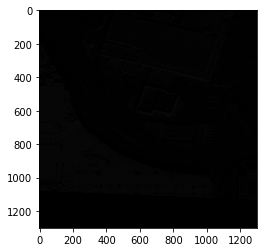

In [73]:
# img = cv2.imread(f'{VEGAS}RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1521.tif')
# img = cv2.imread(f'{VEGAS}MUL/MUL_AOI_2_Vegas_img794.tif')
img = cv2.imread(f'{VEGAS}PAN/PAN_AOI_2_Vegas_img1454.tif')
plt.imshow(img)

In [79]:
os.listdir('SpaceNet_Roads_Sample')

['AOI_5_Khartoum_Roads_Sample',
 'AOI_2_Vegas_Roads_Sample',
 'AOI_4_Shanghai_Roads_Sample',
 'AOI_3_Paris_Roads_Sample']

In [78]:
os.listdir('SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample')

['MUL', 'RGB-PanSharpen', 'geojson', 'PAN', 'summaryData', 'MUL-PanSharpen']

In [84]:
os.listdir(PARIS), os.listdir(PARIS + os.listdir(PARIS)[0])

(['MUL', 'RGB-PanSharpen', 'geojson', 'PAN', 'summaryData', 'MUL-PanSharpen'],
 ['MUL_AOI_3_Paris_img432.tif',
  'MUL_AOI_3_Paris_img38.tif',
  'MUL_AOI_3_Paris_img406.tif',
  'MUL_AOI_3_Paris_img340.tif',
  'MUL_AOI_3_Paris_img235.tif',
  'MUL_AOI_3_Paris_img307.tif',
  'MUL_AOI_3_Paris_img489.tif',
  'MUL_AOI_3_Paris_img28.tif',
  'MUL_AOI_3_Paris_img496.tif',
  'MUL_AOI_3_Paris_img84.tif'])

In [101]:
img = cv2.imread(f'{PARIS}/MUL/MUL_AOI_3_Paris_img432.tif')
# img *= 256
plt.imshow(img)

TypeError: 'dtype' is an invalid keyword argument for this function

In [100]:
img.dtype

dtype('uint8')

In [107]:
img *= 100; img

array([[[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [200, 100, 100],
        [200, 100, 100],
        [200, 200, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [200, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[200, 100, 100],
        [200, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[200, 100, 100],
        [200, 100, 100],
        [200, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [200, 100, 100],
        [200, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]]

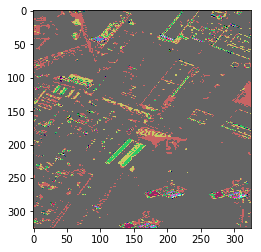

In [108]:
plt.imshow(img)

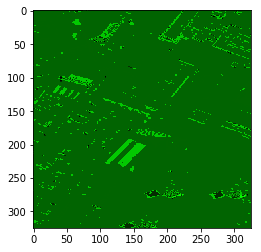

In [135]:
img = cv2.imread(f'{PARIS}/MUL/MUL_AOI_3_Paris_img432.tif')
img[:,:,1] *= 100
plt.imshow(img)

In [129]:
img.shape

(325, 325, 3)

In [136]:
os.listdir(PARIS), os.listdir(PARIS + os.listdir(PARIS)[1])

(['MUL', 'RGB-PanSharpen', 'geojson', 'PAN', 'summaryData', 'MUL-PanSharpen'],
 ['RGB-PanSharpen_AOI_3_Paris_img84.tif',
  'RGB-PanSharpen_AOI_3_Paris_img235.tif',
  'RGB-PanSharpen_AOI_3_Paris_img340.tif',
  'RGB-PanSharpen_AOI_3_Paris_img406.tif',
  'RGB-PanSharpen_AOI_3_Paris_img432.tif',
  'RGB-PanSharpen_AOI_3_Paris_img496.tif',
  'RGB-PanSharpen_AOI_3_Paris_img38.tif',
  'RGB-PanSharpen_AOI_3_Paris_img307.tif',
  'RGB-PanSharpen_AOI_3_Paris_img489.tif',
  'RGB-PanSharpen_AOI_3_Paris_img28.tif'])

In [144]:
os.listdir(PARIS)[1]+'/'+os.listdir(PARIS + os.listdir(PARIS)[1])[0]

'RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img84.tif'

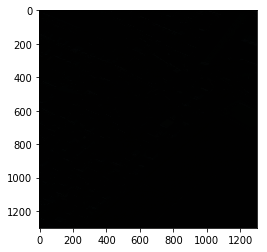

In [165]:
# img = cv2.imread(f'{PARIS}/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img84.tif')
img = cv2.imread(f'{PARIS}/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img406.tif')
# img *= 80

# for i,e in enumerate(img):
#     img[i] = 255 * e / img.max()

plt.imshow(img)

In [167]:
img.max(), img.min()

(7, 0)

In [168]:
img = np.array([[255 * c / img.max() for c in r] for r in img])

KeyboardInterrupt: 

In [ ]:
plt.imshow(img)

In [97]:
img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 1, 1],
        [2, 1, 1],
        [2, 2, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 1, 1],
        [2, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 1, 1],
        [2, 1, 1],
        [2, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [2, 1, 1],
        [2, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

Are all of the sample images black or something?

In [88]:
PARIS

'SpaceNet_Roads_Sample/AOI_3_Paris_Roads_Sample/'

In [89]:
os.getcwd()

'/home/ubuntu/spacenet'

In [90]:
os.listdir(PARIS)

['MUL', 'RGB-PanSharpen', 'geojson', 'PAN', 'summaryData', 'MUL-PanSharpen']

In [87]:
img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 1, 1],
        [2, 1, 1],
        [2, 2, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 1, 1],
        [2, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 1, 1],
        [2, 1, 1],
        [2, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [2, 1, 1],
        [2, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [59]:
img

array([[[1, 2, 1],
        [1, 2, 1],
        [1, 2, 1],
        ...,
        [1, 2, 1],
        [1, 2, 1],
        [1, 2, 1]],

       [[1, 2, 1],
        [1, 2, 1],
        [1, 2, 1],
        ...,
        [1, 2, 1],
        [1, 2, 1],
        [1, 2, 1]],

       [[1, 2, 1],
        [1, 2, 1],
        [1, 2, 1],
        ...,
        [1, 2, 1],
        [1, 2, 1],
        [1, 2, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)